In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Ingestion

In [4]:
data=pd.read_csv(r'C:\Users\hp\Desktop\household_power_consumption.txt',sep=';',low_memory=False,na_values=['nan','?'])

In [5]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


# Attribute Information

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [8]:
data.shape

(2075259, 9)

From above we can find there are total 2075259 rows and 9 features

**Since the dataset is very large so we are taking 50000 sample from the dataset**

In [9]:
data=data.sample(50000).reset_index().drop('index',axis=1)

In [10]:
data.shape

(50000, 9)

# EDA

In [11]:
#checking feature
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [12]:
#checking info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   50000 non-null  object 
 1   Time                   50000 non-null  object 
 2   Global_active_power    49385 non-null  float64
 3   Global_reactive_power  49385 non-null  float64
 4   Voltage                49385 non-null  float64
 5   Global_intensity       49385 non-null  float64
 6   Sub_metering_1         49385 non-null  float64
 7   Sub_metering_2         49385 non-null  float64
 8   Sub_metering_3         49385 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.4+ MB


In [13]:
#converting Date feature datatype to datetime
data['Date']=pd.to_datetime(data['Date'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   50000 non-null  datetime64[ns]
 1   Time                   50000 non-null  object        
 2   Global_active_power    49385 non-null  float64       
 3   Global_reactive_power  49385 non-null  float64       
 4   Voltage                49385 non-null  float64       
 5   Global_intensity       49385 non-null  float64       
 6   Sub_metering_1         49385 non-null  float64       
 7   Sub_metering_2         49385 non-null  float64       
 8   Sub_metering_3         49385 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 3.4+ MB


In [15]:
#dropping the column Time
data.drop('Time',axis=1,inplace=True)

In [16]:
data.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2010-08-02,2.616,0.076,242.33,10.8,0.0,0.0,19.0
1,2007-07-26,0.224,0.112,235.27,1.0,0.0,0.0,0.0
2,2008-06-16,1.938,0.248,240.16,8.0,0.0,0.0,18.0
3,2010-05-06,2.586,0.092,241.89,10.6,38.0,0.0,0.0
4,2008-07-26,0.234,0.100,239.38,1.0,0.0,2.0,1.0


In [17]:
#Grouping data on the basis of dates
data=data.groupby('Date').sum()

In [18]:
data.reset_index(inplace=True)

In [20]:
#creating two columns month and year
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month

In [21]:
data.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month
0,2006-12-16,26.834,0.720,1890.66,114.6,0.0,4.0,84.0,2006,12
1,2006-12-17,85.920,5.756,8139.11,361.4,78.0,132.0,396.0,2006,12
2,2006-12-18,56.092,4.340,9168.80,235.8,38.0,146.0,244.0,2006,12
3,2006-12-19,35.980,4.052,8718.24,153.2,0.0,129.0,181.0,2006,12
4,2006-12-20,53.804,3.766,8942.63,225.2,0.0,7.0,316.0,2006,12


In [27]:
data[data['year']==2006].count()

Date                     16
Global_active_power      16
Global_reactive_power    16
Voltage                  16
Global_intensity         16
Sub_metering_1           16
Sub_metering_2           16
Sub_metering_3           16
year                     16
month                    16
dtype: int64

In [29]:
data.shape

(1442, 10)

In [30]:
#checking null values
data.isna().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
dtype: int64

In [31]:
data.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
dtype: int64

There is no null or missing values in dataset

In [32]:
#checking duplicate values
data.duplicated().sum()

0

There is no duplicates data in the dataset

In [33]:
data.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month
0,2006-12-16,26.834,0.720,1890.66,114.6,0.0,4.0,84.0,2006,12
1,2006-12-17,85.920,5.756,8139.11,361.4,78.0,132.0,396.0,2006,12
2,2006-12-18,56.092,4.340,9168.80,235.8,38.0,146.0,244.0,2006,12
3,2006-12-19,35.980,4.052,8718.24,153.2,0.0,129.0,181.0,2006,12
4,2006-12-20,53.804,3.766,8942.63,225.2,0.0,7.0,316.0,2006,12


(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

In [34]:
#Target variable power consumption
pc=(data['Global_active_power']*1000/60)
sm=data['Sub_metering_1']+data['Sub_metering_2']+data['Sub_metering_3']
data['power_consumption']=pc-sm

In [35]:
data.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,power_consumption
0,2006-12-16,26.834,0.720,1890.66,114.6,0.0,4.0,84.0,2006,12,359.233333
1,2006-12-17,85.920,5.756,8139.11,361.4,78.0,132.0,396.0,2006,12,826.000000
2,2006-12-18,56.092,4.340,9168.80,235.8,38.0,146.0,244.0,2006,12,506.866667
3,2006-12-19,35.980,4.052,8718.24,153.2,0.0,129.0,181.0,2006,12,289.666667
4,2006-12-20,53.804,3.766,8942.63,225.2,0.0,7.0,316.0,2006,12,573.733333


In [37]:
data['sub_metering']=data['Sub_metering_1']+data['Sub_metering_2']+data['Sub_metering_3']

In [42]:
data=data.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)

In [43]:
#dropping Date feature
data.drop('Date',axis=1,inplace=True)

KeyError: "['Date'] not found in axis"

# Graphical Analysis

In [44]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,power_consumption,sub_metering
0,26.834,0.720,1890.66,114.6,2006,12,359.233333,88.0
1,85.920,5.756,8139.11,361.4,2006,12,826.000000,606.0
2,56.092,4.340,9168.80,235.8,2006,12,506.866667,428.0
3,35.980,4.052,8718.24,153.2,2006,12,289.666667,310.0
4,53.804,3.766,8942.63,225.2,2006,12,573.733333,323.0
...,...,...,...,...,...,...,...,...
1437,20.534,5.096,7201.28,92.2,2010,12,175.233333,167.0
1438,9.846,2.434,6272.64,43.4,2010,12,78.100000,86.0
1439,41.672,4.008,7970.44,175.6,2010,12,343.533333,351.0
1440,40.540,3.810,8415.11,170.2,2010,12,424.666667,251.0


# Separating Dependent and Independent Variable

In [45]:
#dependent variable
X=data[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','year','month','sub_metering']]

In [46]:
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,sub_metering
0,26.834,0.720,1890.66,114.6,2006,12,88.0
1,85.920,5.756,8139.11,361.4,2006,12,606.0
2,56.092,4.340,9168.80,235.8,2006,12,428.0
3,35.980,4.052,8718.24,153.2,2006,12,310.0
4,53.804,3.766,8942.63,225.2,2006,12,323.0
...,...,...,...,...,...,...,...
1437,20.534,5.096,7201.28,92.2,2010,12,167.0
1438,9.846,2.434,6272.64,43.4,2010,12,86.0
1439,41.672,4.008,7970.44,175.6,2010,12,351.0
1440,40.540,3.810,8415.11,170.2,2010,12,251.0


In [49]:
Y=data[['power_consumption']]

In [50]:
Y

,power_consumption
0,359.233333
1,826.000000
2,506.866667
3,289.666667
4,573.733333
...,...
1437,175.233333
1438,78.100000
1439,343.533333
1440,424.666667


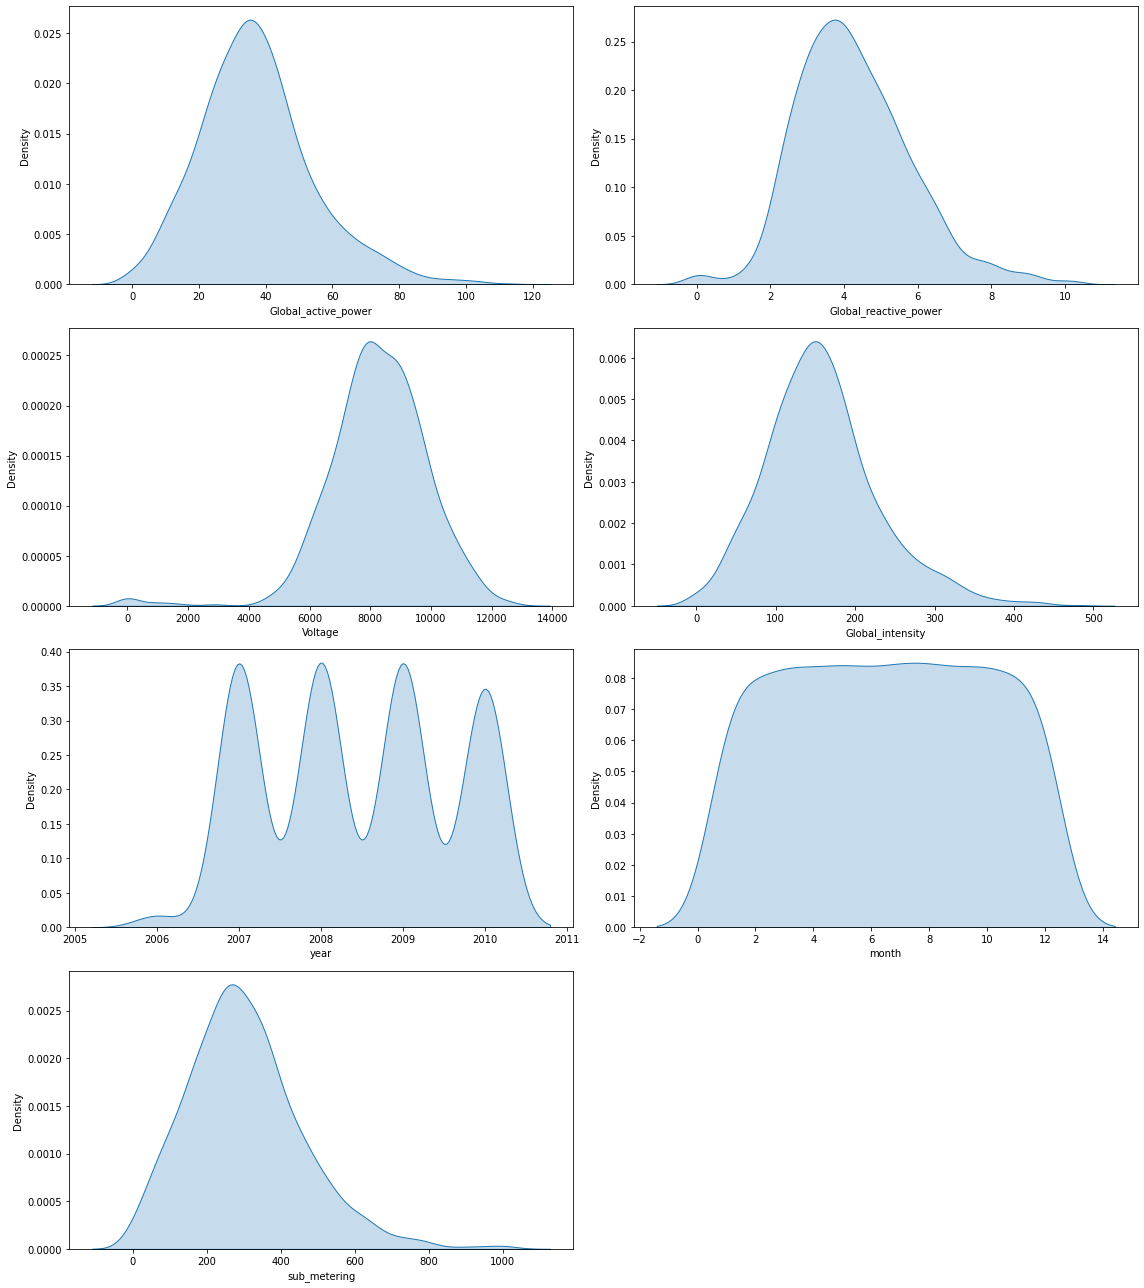

In [57]:
plt.figure(figsize=(16,18))
for col in range(0,len(X.columns)):
    plt.subplot(4,2,col+1)
    sns.distplot(x=X[X.columns[col]],shade=True,data=X)
    plt.tight_layout()

<AxesSubplot:xlabel='year', ylabel='count'>

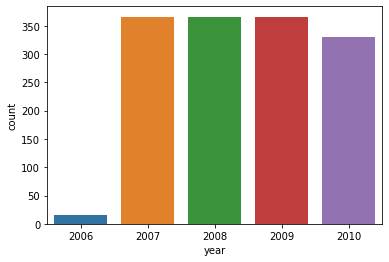

In [60]:
sns.countplot(x=X['year'])

<AxesSubplot:xlabel='month', ylabel='count'>

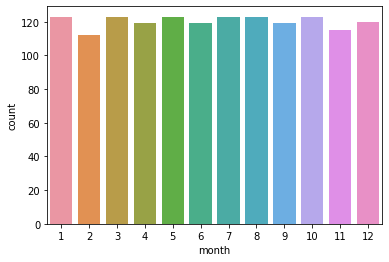

In [61]:
sns.countplot(x=X['month'])

<AxesSubplot:>

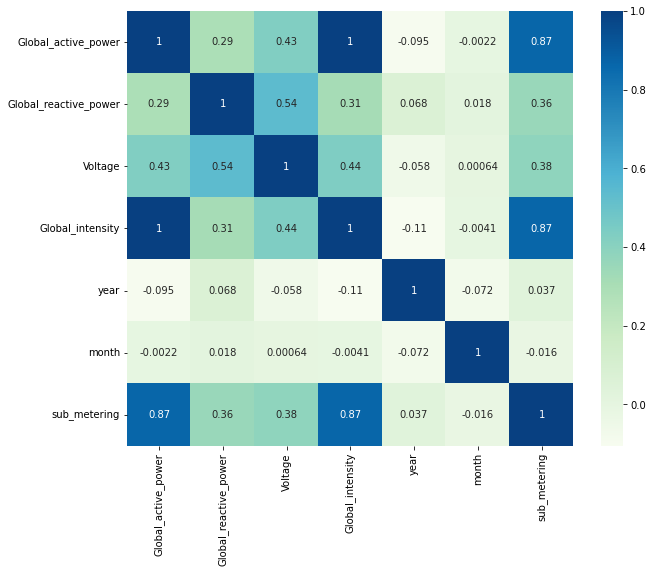

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(),cmap='GnBu',annot=True)